## Worksheet 3: Classification 

#### Please upload to Blackboard the .ipynb file, containing your last name.

#### Original work statement: Meryem El baz

Please write your name here to indicate that your worksheet is the result of your own work, and you have not copied from sources without citing them (this is plagiarism and is not acceptable). Identical or very similar worksheet will share the credit.


1\. (not a coding exercise). You have a data set that contains cars, motorcycles, bikes, and tricycles. Your features are weight and number of wheels. How could you build an optimal decision tree classifier? Describe the splits and the value at which you would split the features.

                                        4 wheels? 
                              yes ___________|____________no
                              CAR                        2 Wheels?
                                                yes__________|___________no
                                             weight>150?               TRICYCLE
                                      yes________|_______no
                                   MOTORCYCLE           BIKE

We will now work with the digits data set and do something similar to what we did with Iris.
We want to "teach" the machine how the different digits look like so that the system can correctly classify new examples of hand-written digits.

We can import the data set by doing:

In [1]:
import sklearn
from sklearn import datasets

digits = datasets.load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

2\. Create numpy arrays containing the features and target values for this data set.

In [2]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [3]:
print(digits.target)
print(digits.target.size)

[0 1 2 ... 8 9 8]
1797


In [4]:
digits.data.shape

(1797, 64)

3\. How many objects are in this data set? How many features? 

In [5]:
print(digits.target.size) #to print how many objects we have
print(digits.images.size/1797 ) #to print how manay features we have

1797
64.0


4\. How many possible target values do you have? 

In [6]:
digits.target_names #we have 10 possible target values 1,2,3,4,5,6,7,8,9 and 0

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

5\. Is the data set balanced or imbalanced? Justify your answer.

In [7]:
import matplotlib.pyplot as plt
plt.hist(digits.target) #from the histogram, we can tell that the data is balanced because it looks like every digit is 
#represented by the same number of objects

(array([178., 182., 177., 183., 181., 182., 181., 179., 174., 180.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

6\. The values that you see for the features of this data set are the brightness, on a scale of 0 to 1, of each of the pixels in the image. The following code plots the first 100 objects. Just based on what you see, what digits do you think would be easier for an algorithm to classify correctly and why?

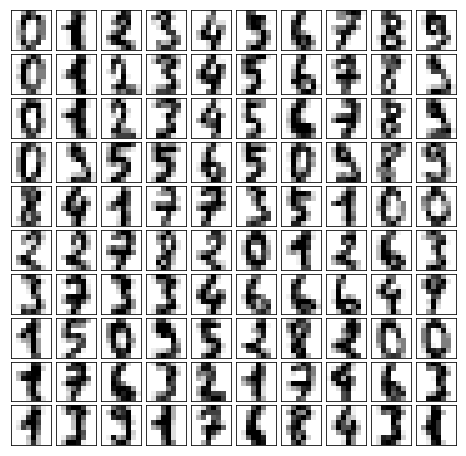

In [8]:
##### import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')


In [9]:
#based on what i see, I could tell that the algorithm might classify 0,1,5,6,9,7 
#because they are visually easier to notice

7\. Following what we did for the Iris data set, create a train/test split of this data set with 70% of the data in the training set and 30% of the data in the test set. Fit a decision tree classifier with default values to the training set, and predict the target values for the test set.

In [10]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, test_size = 0.30)

In [11]:
Xtrain.shape, ytrain.shape

((1257, 64), (1257,))

In [12]:
model.fit(Xtrain,ytrain)
ypred = model.predict(Xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

0.8537037037037037

8\. Report the accuracy score. Based on your answer to Q5, is accuracy a meaningful scorer for this data set?

In [13]:
#The accuracy score is pretty low for this data, and I tink it's meaningful because we didn't use all the data in building
# the model

9\. Repeat the steps 7-8 using a 50/50 train/test split, and a 85/15 train/test split. What happens to the accuracy? Would you expect the accuracy to go up or down as your training set becomes larger?

In [14]:
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, test_size = 0.50)

In [15]:
model.fit(Xtrain,ytrain)
ypred = model.predict(Xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

0.8220244716351501

In [16]:
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, test_size = 0.15)

In [17]:
model.fit(Xtrain,ytrain)
ypred = model.predict(Xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

0.8481481481481481

In [18]:
#The accuracy is almost the same. I was expecting that the accuracy would go up when we make the training set larger
#because more objects will contribute in the model 

10\. Repeat the procedure with the 80/20 train/test split, but setting five different values of the random seed (parameter "random_state" in the train_test_split function). Record and report the five accuracy scores and their standard deviation.

In [28]:
import numpy as np
i=0
L=[]
while i<5:
    Xtrain2, Xtest2, ytrain2, ytest2 = train_test_split(digits.data, digits.target, test_size = 0.20,random_state=i)
    model.fit(Xtrain,ytrain)
    ypred = model.predict(Xtest)
    L+=[accuracy_score(ytest,ypred)]
    i=i+1
print(L)
print(np.std(L))
    

[0.8296296296296296, 0.8481481481481481, 0.8333333333333334, 0.8666666666666667, 0.8333333333333334]
0.013778574250176501


11\. Report and plot the confusion matrix for this example (note: the labels are the class *names*). Which digit(s) is (are) most often classified incorrectly? 

In [20]:
from sklearn.metrics import confusion_matrix
#This is just a function that plots them

import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[29  0  0  0  0  0  0  0  0  0]
 [ 0 22  0  0  1  0  0  1  2  0]
 [ 1  2 23  1  0  0  0  0  1  0]
 [ 0  0  2 19  0  1  0  1  2  0]
 [ 1  0  0  1 26  0  0  1  1  1]
 [ 0  0  0  0  2 15  0  0  0  0]
 [ 0  0  0  0  0  1 26  0  0  0]
 [ 1  0  0  0  2  0  0 25  1  0]
 [ 0  0  2  1  0  0  0  0 22  1]
 [ 0  0  1  2  0  1  0  0  3 25]]


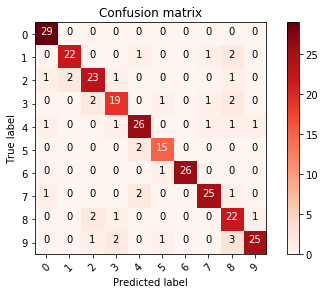

In [21]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(ytest, ypred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=digits.target_names,
                      title='Confusion matrix')

In [22]:
# For Example,9 got classified incorrecrly 6 times and 3 got classified incorrectly 6 times
# we can see that 0 got classigied correctly 100%

12\. With reference to the question above: why do you think this is the case?

In [23]:
# I think it's because these numbers such as 3,9, 8 have hight pixel concentration in the middle,
#so they get confused by other similar digits

13\. (Extra Credit) Play with different parameters in the Decision Tree Classifier to see if you can increase the accuracy.

In [412]:
model = DecisionTreeClassifier(max_depth=10)
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, test_size = 0.01)
model.fit(Xtrain,ytrain)
ypred = model.predict(Xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

1.0

In [285]:
DecisionTreeClassifier?

In [ ]:
#we don't wanna have a higher depth than 10 because that's the number of possible outcomes that
#we have 0,1,.....,9